In [28]:
print("Iniciando el script de analisis candidatos neutrones...")
print("Importando librerias necesarias...")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions_spills
import functions_analysis
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.ticker as ticker
import glob
import os
import pickle

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

Iniciando el script de analisis candidatos neutrones...
Importando librerias necesarias...


In [29]:
with open('Filtered_data/datos_filtrados.pkl', 'rb') as f:
    valores_read, indices_read = pickle.load(f)

with open('Filtered_data/datos_filtrados_sig.pkl', 'rb') as f:
    valores_read_sig, indices_read_sig = pickle.load(f)

times_branch_filtered = functions_analysis.a_lista_de_arrays(valores_read, indices_read)
times_branch_filtered_sig = functions_analysis.a_lista_de_arrays(valores_read_sig, indices_read_sig)

times_branch_filtered = times_branch_filtered[0:2000]
times_branch_filtered_sig = times_branch_filtered_sig[0:2000]

N_events = len(times_branch_filtered)
N_events_sig = len(times_branch_filtered_sig)

print("Numero de eventos bkg", N_events)
print("Numero de eventos señal", N_events_sig)

Numero de eventos bkg 2000
Numero de eventos señal 2000


In [30]:
nHitsDistribution_dict = {}

for event in np.arange(0, N_events, 1):
    _, nHits_i = functions_analysis.count_nHits(times_branch_filtered[event], 100, 10, 300)
    if len(nHits_i) != 0:
        nHitsDistribution_dict[event] = nHits_i


In [32]:
nHitsDistribution_dict_sig = {}

for event in np.arange(0, N_events_sig, 1):
    _, nHits_i = functions_analysis.count_nHits(times_branch_filtered_sig[event], 100, 10, 300)
    if len(nHits_i)!=0:
        nHitsDistribution_dict_sig[event] = nHits_i


In [33]:
print(nHitsDistribution_dict)

{1: [11], 2: [76, 11, 36], 3: [43], 7: [247], 9: [23], 13: [57, 11], 14: [12, 12], 15: [15], 16: [11, 11], 17: [44], 19: [101, 63], 21: [12, 38], 23: [26, 16, 14], 24: [23], 33: [19], 34: [23], 35: [200], 38: [12], 39: [24], 42: [56], 43: [238, 23], 46: [196], 47: [11], 49: [41], 52: [17, 11, 22], 56: [120], 62: [27], 63: [150], 68: [14], 70: [13], 73: [83], 77: [21], 82: [41, 62], 87: [105, 253], 89: [221], 91: [12], 98: [43], 102: [17], 105: [11, 14], 106: [89], 107: [11, 23], 110: [24], 115: [18], 120: [219], 123: [20], 125: [11], 126: [13], 129: [41], 130: [130], 136: [164], 140: [87, 72], 143: [144, 23, 27], 145: [21, 27], 146: [11], 151: [124, 206, 32], 153: [13], 160: [46], 164: [13], 165: [13], 177: [26], 180: [20, 170, 23], 182: [19], 183: [11], 184: [76], 186: [19], 190: [11], 195: [34], 196: [15, 73], 200: [233, 168], 203: [177], 209: [121, 73], 210: [101], 215: [222], 218: [11], 228: [203, 52], 230: [105], 233: [236], 239: [14], 240: [27], 241: [13], 242: [14], 244: [92], 2

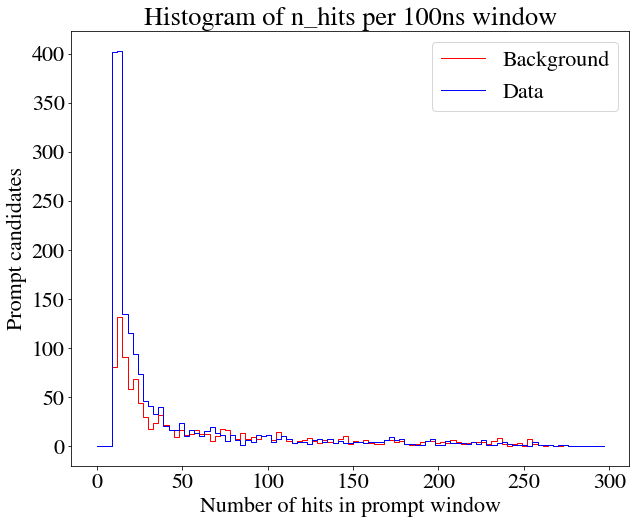

In [36]:
all_n_hits = []
for nHits_list in nHitsDistribution_dict.values():
    all_n_hits.extend(nHits_list)

all_n_hits_sig = []
for nHits_list in nHitsDistribution_dict_sig.values():
    all_n_hits_sig.extend(nHits_list)

hist, bins_edges = np.histogram(all_n_hits, bins=100, range=(0, 300))
hist_sig, _ = np.histogram(all_n_hits_sig, bins = bins_edges)

plt.figure()
plt.step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
plt.step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
plt.xlabel('Number of hits in prompt window')
plt.ylabel('Prompt candidates')
plt.legend()
plt.title('Histogram of n_hits per 100ns window')
plt.show()
